## python勉強会　第19回　sklearn2 20200911 

In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
import japanize_matplotlib
%matplotlib inline


### 本回では、これまでの講義の復習も兼ねて、データ分析のチュートリアルを行う。
### ボストンの地価予測問題を用いて、回帰分析を行う。
CRIM    :犯罪発生率  
ZN      :住居区画の密集度  
INDUS   :非小売業の土地割合  
CHAS    :チャールズ川 (1: 川の周辺, 0: それ以外)  
NOX	    :NOx濃度  
RM	    :住居の平均部屋数  
AGE	    :1940年より前に建てられた物件割合  
DIS	    :5つのボストン市の雇用施設からの重み付き距離  
RAD	    :大きな道路へのアクセスしやすさ  
TAX	    :$10,000ドルあたりの不動産税率の総計  
PTRATIO	:教師あたりの生徒数  
B	    :黒人の比率 1000(Bk – 0.63)^2  
LSTAT	:低所得者の割合


In [2]:
#データのダウンロード
from sklearn.datasets import load_boston
boston = load_boston()

#説明変数
X = boston.data

#目的変数
Y = boston.target

#可視化のために、DataFrameにする。
df = pd.DataFrame(X, columns=boston.feature_names).assign(PRICE=np.array(Y))

#ヘッダの出力
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### 【問題１】
### データの統計量を出力してください。また欠損値があるか確認してください。

In [3]:
#データの統計量
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [4]:
#欠損値の確認
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
PRICE      0
dtype: int64

### 【問題２】
### 各変数同士の相関を調べてください。また、それをヒートマップとして可視化してください。

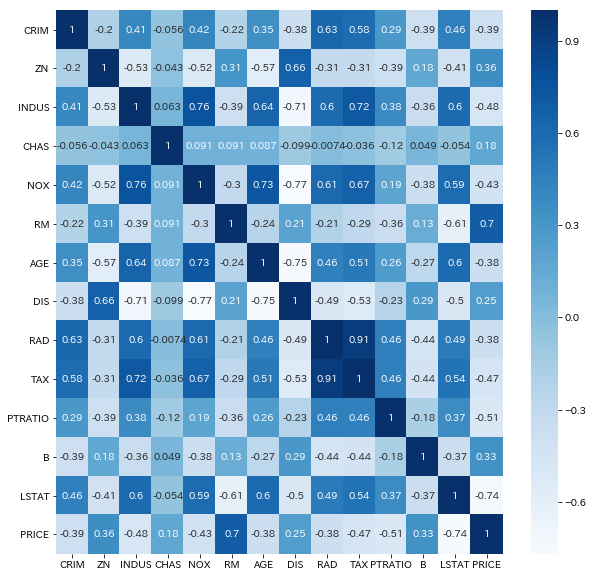

In [5]:
#相関
corr = df.corr()
corr_df = pd.DataFrame(corr,columns=df.columns,index=df.columns)
plt.figure(figsize=(10,10))
sns.heatmap(corr_df,cmap="Blues",annot=True)

### 【問題３】
### 相関が高そうな変数同士を、散布図として可視化してください。

<Figure size 432x288 with 0 Axes>

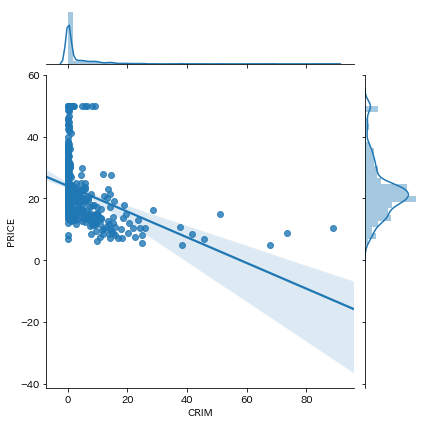

<Figure size 432x288 with 0 Axes>

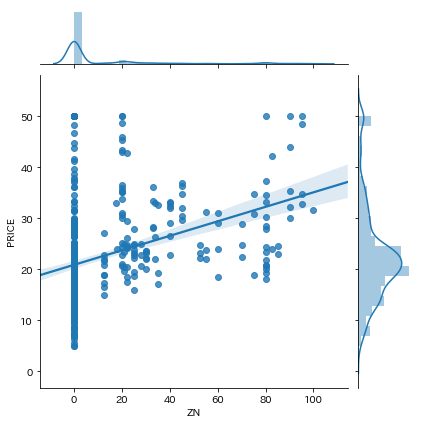

<Figure size 432x288 with 0 Axes>

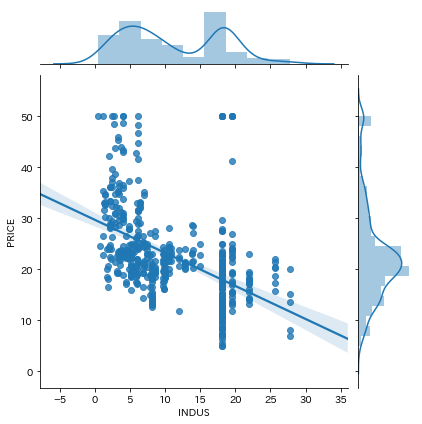

<Figure size 432x288 with 0 Axes>

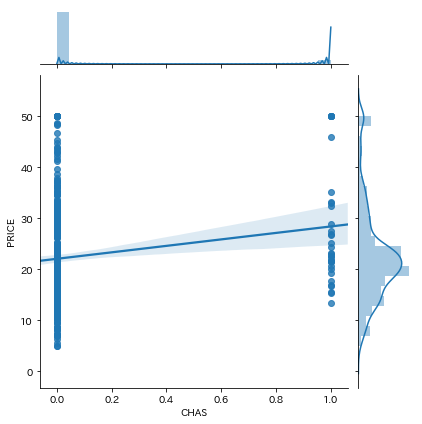

<Figure size 432x288 with 0 Axes>

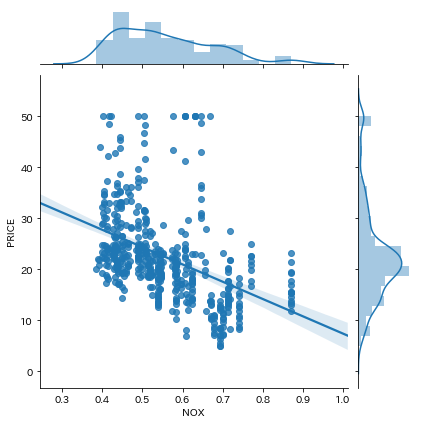

<Figure size 432x288 with 0 Axes>

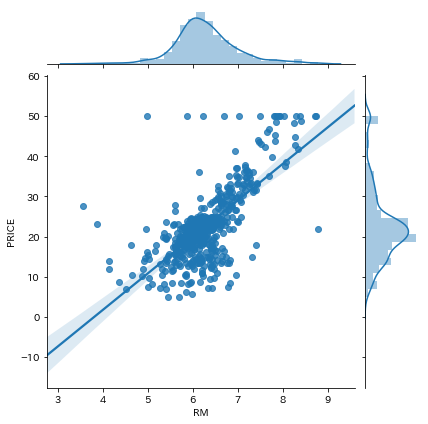

<Figure size 432x288 with 0 Axes>

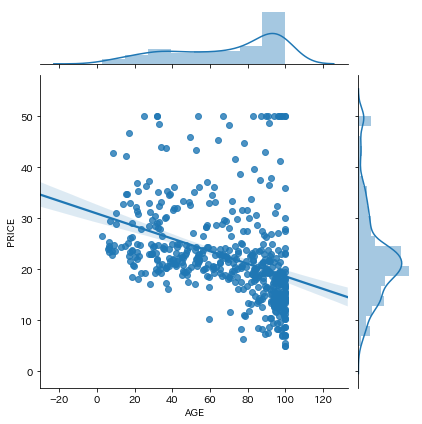

<Figure size 432x288 with 0 Axes>

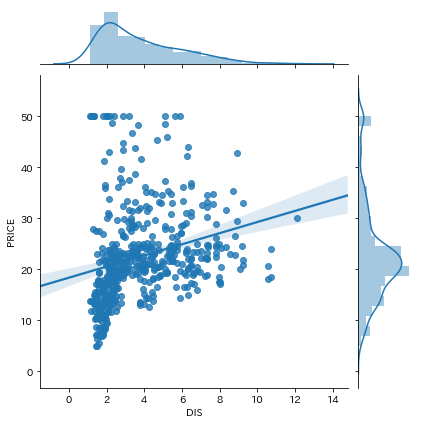

<Figure size 432x288 with 0 Axes>

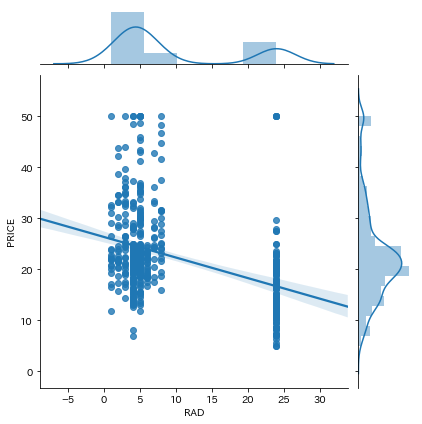

<Figure size 432x288 with 0 Axes>

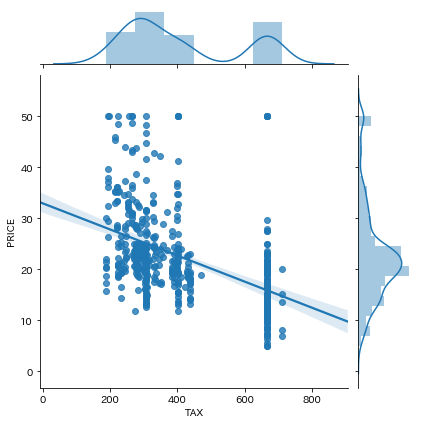

<Figure size 432x288 with 0 Axes>

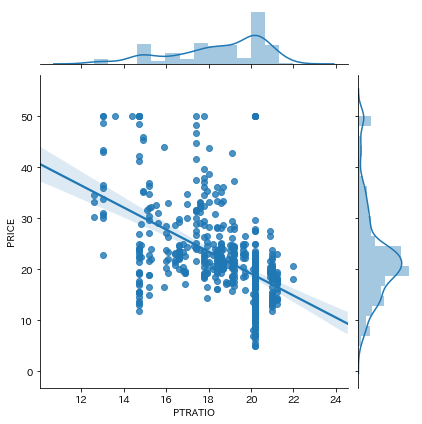

<Figure size 432x288 with 0 Axes>

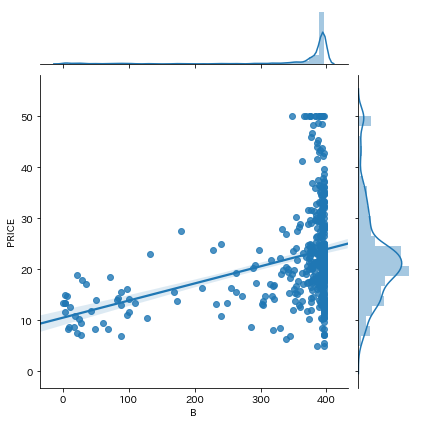

<Figure size 432x288 with 0 Axes>

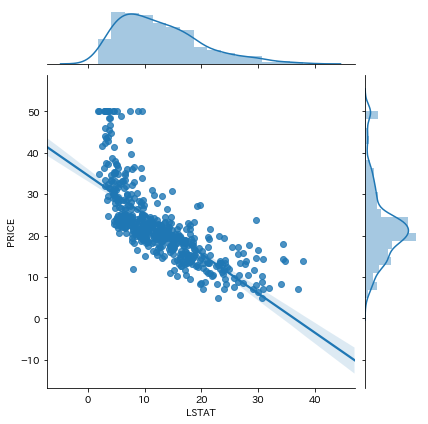

In [41]:
#各説明変数と目的変数との散布図
for name in df.columns:
    if not name == "PRICE":
        plt.figure()
        sns.jointplot(x=name,y="PRICE",data=df,kind="reg")

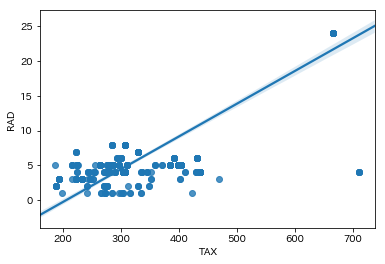

In [7]:
#大きい道路へのアクセスが良いと、所得税も上がる？
sns.regplot(x="TAX",y="RAD",data=df)

### 【問題３】
### データを学習：テスト＝8:2に分割してください。
### train_test_spilitをつかいます。

In [12]:
from sklearn.model_selection import train_test_split

x_df = df.drop(["PRICE"],axis=1)
y_df = df["PRICE"]

X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2)

### 【問題４】
### 線形重回帰モデルを使って、回帰分析します。以下の空欄部分を埋めてください。

R^2_train
0.7444750353767677
R^2_test
0.7161512709225346
RMSE
4.517815467312082
                 0
CRIM     -0.101257
ZN        0.050156
INDUS     0.050887
CHAS      2.565215
NOX     -19.846090
RM        3.768712
AGE       0.008267
DIS      -1.388731
RAD       0.284964
TAX      -0.011634
PTRATIO  -0.957802
B         0.009809
LSTAT    -0.538774


Text(8, 45, 'RMSE = 4.52')

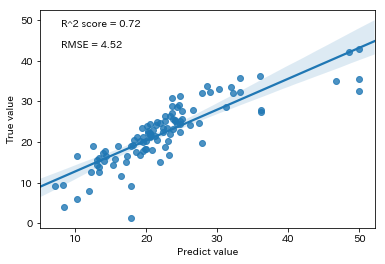

In [67]:
#線形回帰モジュールのインポート
from sklearn import linear_model
from sklearn.metrics import mean_squared_error,r2_score

#線形回帰モデルを宣言します。
l_model = linear_model.LinearRegression()

################################
#線形回帰モデルを学習してください。
l_model.fit(X_train,y_train)

#訓練データの決定係数（R^2）を算出してください。
print("R^2_train")
print(l_model.score(X_train,y_train))

#テストデータの決定係数（R^2）を算出してください。
print("R^2_test")
print(l_model.score(X_test,y_test))

#２乗平均平方根誤差（RMSE）の表示
print("RMSE")
rmse = np.sqrt(mean_squared_error(y_test, l_model.predict(X_test))) 
print(rmse)


#線形重回帰モデルの各係数を出力してください。
cof_df = pd.DataFrame(l_model.coef_)
cof_df.index = list(X_train.columns)
print(cof_df)


#テストデータの予測値と真値の散布図を可視化してください。
sns.regplot(y_test,l_model.predict(X_test))
plt.xlabel("Predict value")
plt.ylabel("True value")
plt.text(x=8,y=50,s="R^2 score = {:.2f}".format(l_model.score(X_test,y_test)),va="top",ha="left",fontsize=10)#決定係数の表示
plt.text(x=8,y=45,s="RMSE = {:.2f}".format(rmse),va="top",ha="left",fontsize=10)#RMSEの表示

###############################





### 【問題５】
### 非線形モデルを使って、回帰分析します。今回はランダムフォレストを使います。以下の空欄部分を埋めてください。

0.9727307096202752
0.8803662219532215
RMSE
2.932999033980975


Text(8, 45, 'RMSE = 2.93')

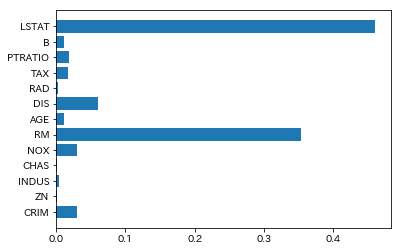

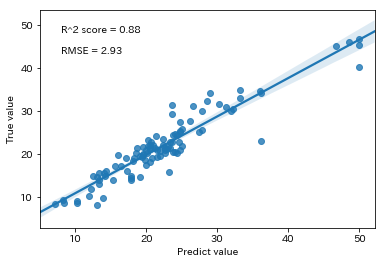

In [75]:
#ランダムフォレストの回帰モジュールをインポートする。
from sklearn.ensemble import RandomForestRegressor
 
#モデルを宣言する。
rf_model = RandomForestRegressor()

##########################
#モデルを学習する。
rf_model.fit(X_train,y_train)

#学習データの決定係数を求める。
print(rf_model.score(X_train,y_train))

#テストデータの決定係数を求める。
print(rf_model.score(X_test,y_test))

#２乗平均平方根誤差（RMSE）の表示
print("RMSE")
rmse = np.sqrt(mean_squared_error(y_test, rf_model.predict(X_test))) 
print(rmse)

#重要度の高い変数を表示する。
plt.figure()
plt.barh(y=X_train.columns,width=rf_model.feature_importances_)

#真値と予測値の散布図を表示する。
plt.figure()
sns.regplot(y_test,rf_model.predict(X_test))
plt.xlabel("Predict value")
plt.ylabel("True value")
plt.text(x=8,y=50,s="R^2 score = {:.2f}".format(rf_model.score(X_test,y_test)),va="top",ha="left",fontsize=10)#決定係数の表示
plt.text(x=8,y=45,s="RMSE = {:.2f}".format(rmse),va="top",ha="left",fontsize=10)#RMSEの表示

